In [217]:
import numpy as np
import keras
import tensorflow as tf
import matplotlib.pyplot as plt

In [220]:
x,y = np.meshgrid(np.linspace(-10,10,500),np.linspace(-10,10,500))

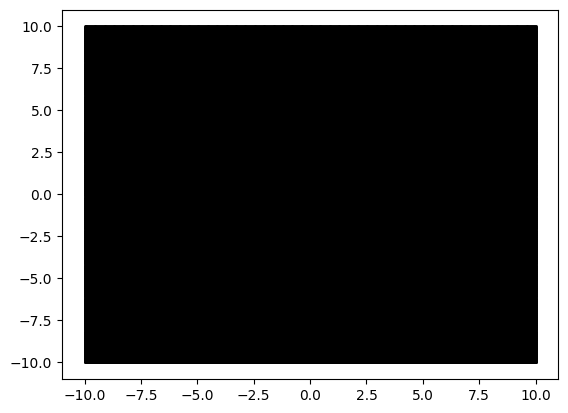

In [221]:
plt.plot(x,y,marker='o', linestyle='', ms=1, color='k')

In [239]:
mask = ((x-1)**2 + y**2) <= 1
mask_not = (mask ^ 1).astype(bool)

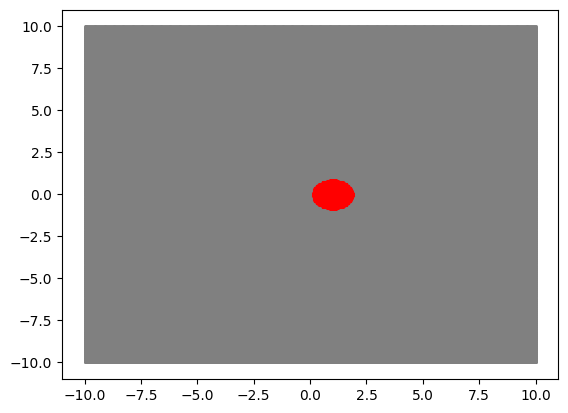

In [240]:
plt.plot(x[mask],y[mask],marker='o', linestyle='', ms=1, color='red')
plt.plot(x[mask_not],y[mask_not],marker='o', linestyle='', ms=1, color='gray')

In [298]:
X = tf.convert_to_tensor(np.column_stack((x.flatten(),y.flatten())))

In [346]:
Y1 = [tf.reduce_sum(tf.square(X+(i, 0)), axis=1) for i in np.linspace(-10, 10, 5)]
Y = Y1[0] < 1
for i in range(1, len(Y1)):
    Y = tf.logical_or(Y, Y1[i] < 1)

Y = tf.cast(Y, tf.float32)

In [357]:
model = keras.Sequential([
    keras.layers.Dense(5000, input_shape=(2,), activation='relu'),
    keras.layers.Dense(1)
])

model.compile("adam", "MSE")

In [358]:
model.fit(X, Y, epochs=10, batch_size=256, verbose=1)

Epoch 1/10
977/977 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0332
Epoch 2/10
977/977 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0223
Epoch 3/10
977/977 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0211
Epoch 4/10
977/977 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0208
Epoch 5/10
977/977 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0200
Epoch 6/10
977/977 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0198
Epoch 7/10
977/977 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0192
Epoch 8/10
977/977 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0183
Epoch 9/10
977/977 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0175
Epoch 10/10
977/977 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0161


In [359]:
test_x,test_y = np.meshgrid(np.linspace(-10, 10, 500),np.linspace(-10, 10, 500))

points = np.column_stack((test_x.flatten(),test_y.flatten()))

In [360]:
predictions = model.predict(points).reshape(-1)

7813/7813 ━━━━━━━━━━━━━━━━━━━━ 3s 353us/step


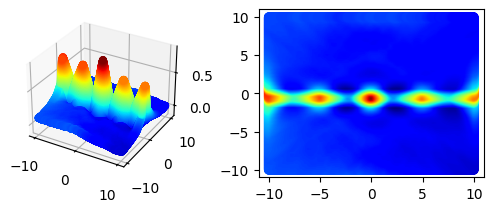

In [361]:
import matplotlib
import matplotlib.cm as cmx

cm = plt.get_cmap("jet")
cNorm = matplotlib.colors.Normalize(vmin=min(predictions), vmax=max(predictions))
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=cm)
ax = plt.subplot(221, projection='3d')
ax.scatter(test_x, test_y, predictions, c=scalarMap.to_rgba(predictions))
plt.subplot(222)
plt.scatter(test_x, test_y, c=scalarMap.to_rgba(predictions))